In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

#Support Vector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


In [2]:
dataset = pd.read_csv('New_Dataset.csv')
dataset

,age,sex,cp,trestbps,chol,fbs,thalach,exang,target
0,63,1,3,145,233,1,150,0,1
1,37,1,2,130,250,0,187,0,1
2,41,0,1,130,204,0,172,0,1
3,56,1,1,120,236,0,178,0,1
4,57,0,0,120,354,0,163,1,1
...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,123,1,0
299,45,1,3,110,264,0,132,0,0
300,68,1,0,144,193,1,141,0,0
301,57,1,0,130,131,0,115,1,0


In [3]:
dataset['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

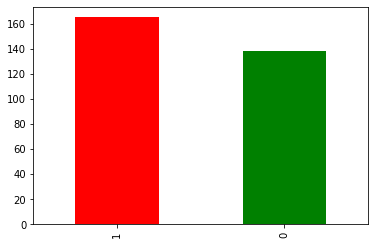

In [4]:
dataset['target'].value_counts().plot(kind='bar', color=['red', 'green'] );

In [5]:
dataset.corr()

,age,sex,cp,trestbps,chol,fbs,thalach,exang,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.398522,0.096801,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.044020,0.141664,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.295762,-0.394280,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.046698,0.067616,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.009940,0.067023,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.008567,0.025665,-0.028046
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,1.000000,-0.378812,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.378812,1.000000,-0.436757
target,-0.225439,-0.280937,0.433798,-0.144931,-0.085239,-0.028046,0.421741,-0.436757,1.000000


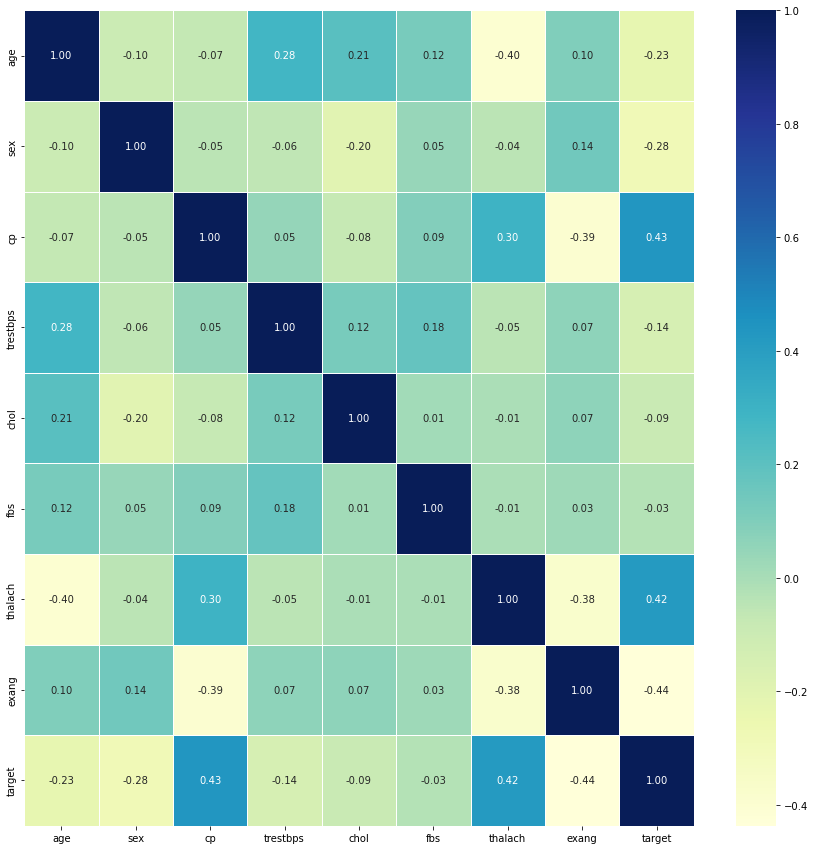

In [6]:
corr_matrix = dataset.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = snb.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt='.2f', cmap='YlGnBu');

In [7]:
# SPlitting data into features and labels

x = dataset.drop('target', axis=1) 

y =dataset['target']


In [8]:
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [9]:
model_dict = {'Logistic Regression': LogisticRegression(),
              'KNN': KNeighborsClassifier(),
              'Random Forest': RandomForestClassifier(),
              'Gradient Boost': GradientBoostingClassifier(),
              'AdaBoost': AdaBoostClassifier(),
              'Extra Tree': ExtraTreesClassifier(),
             }

def fit_and_score (models, x_train, x_test, y_train, y_test):
    
    np.random.seed(42)
    model_accuracy = {}
    
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_accuracy[name] = model.score(x_test, y_test)
        
    return model_accuracy

In [10]:
model_accuracy = fit_and_score(model_dict, x_train, x_test, y_train, y_test)
model_accuracy

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.819672131147541,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.819672131147541,
 'Gradient Boost': 0.7540983606557377,
 'AdaBoost': 0.8360655737704918,
 'Extra Tree': 0.7868852459016393}

In [11]:
np.random.seed(48)
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.8360655737704918

In [12]:
model_accuracy['SVC'] = clf.score(x_test, y_test)
model_accuracy

{'Logistic Regression': 0.819672131147541,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.819672131147541,
 'Gradient Boost': 0.7540983606557377,
 'AdaBoost': 0.8360655737704918,
 'Extra Tree': 0.7868852459016393,
 'SVC': 0.8360655737704918}

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'Gradient Boost'),
  Text(4, 0, 'AdaBoost'),
  Text(5, 0, 'Extra Tree'),
  Text(6, 0, 'SVC')])

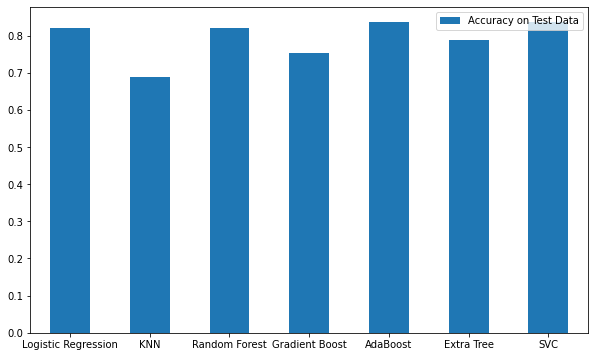

In [13]:
model_compare = pd.DataFrame(model_accuracy, index=['Accuracy on Test Data'])

model_compare.T.plot(kind='bar', figsize=(10,6));
#plt.yticks()
plt.xticks(rotation=0)

In [14]:
model_accuracy2 = fit_and_score(model_dict, x_train, x_train, y_train, y_train)
model_accuracy2

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7892561983471075,
 'KNN': 0.7644628099173554,
 'Random Forest': 1.0,
 'Gradient Boost': 0.9793388429752066,
 'AdaBoost': 0.8801652892561983,
 'Extra Tree': 1.0}

In [15]:
clf.score(x_train, y_train)

0.8223140495867769

In [16]:
model_accuracy2['SVC'] = clf.score(x_train, y_train)
model_accuracy2

{'Logistic Regression': 0.7892561983471075,
 'KNN': 0.7644628099173554,
 'Random Forest': 1.0,
 'Gradient Boost': 0.9793388429752066,
 'AdaBoost': 0.8801652892561983,
 'Extra Tree': 1.0,
 'SVC': 0.8223140495867769}

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'Gradient Boost'),
  Text(4, 0, 'AdaBoost'),
  Text(5, 0, 'Extra Tree'),
  Text(6, 0, 'SVC')])

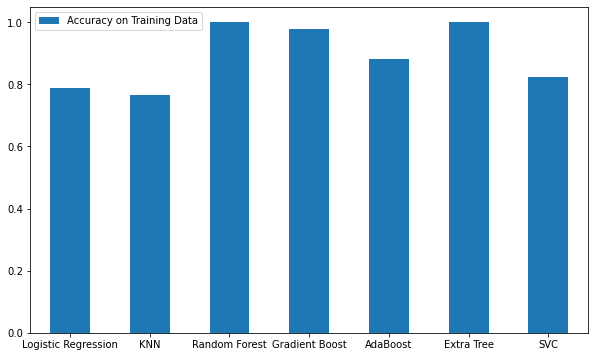

In [17]:
model_compare = pd.DataFrame(model_accuracy2, index=['Accuracy on Training Data'])

model_compare.T.plot(kind='bar', figsize=(10,6));
#plt.yticks()
plt.xticks(rotation=0)

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
clf_a = LogisticRegression(random_state=0)
clf_a.fit(x_train, y_train)
clf_a.score(x_test, y_test)

0.819672131147541

In [20]:
y_pred_a = clf_a.predict(x_test)
print(classification_report(y_test, y_pred_a))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [21]:
clf_b = KNeighborsClassifier(n_neighbors=3)
clf_b.fit(x_train, y_train)
clf_b.score(x_test, y_test)

0.6557377049180327

In [22]:
y_pred_b = clf_b.predict(x_test)
print(classification_report(y_test, y_pred_b))

              precision    recall  f1-score   support

           0       0.62      0.69      0.66        29
           1       0.69      0.62      0.66        32

    accuracy                           0.66        61
   macro avg       0.66      0.66      0.66        61
weighted avg       0.66      0.66      0.66        61



In [23]:
np.random.seed(6)
clf_c = RandomForestClassifier(n_estimators=100)
clf_c.fit(x_train, y_train)

RandomForestClassifier()

In [24]:
clf_c.score(x_test, y_test)

0.8360655737704918

In [25]:
y_pred_c = clf_c.predict(x_test)

In [26]:
print(classification_report(y_test, y_pred_c))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [27]:
clf_d = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf_d.fit(x_train, y_train)
clf_d.score(x_test, y_test)

0.8360655737704918

In [28]:
y_pred_d = clf_d.predict(x_test)

In [29]:
print(classification_report(y_test, y_pred_d))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84        29
           1       0.92      0.75      0.83        32

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61



In [30]:
clf_e = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_e.fit(x_train, y_train)
clf_e.score(x_test, y_test), clf_e.score(x_train, y_train)

(0.8688524590163934, 0.9214876033057852)

In [31]:
y_pred_e = clf_e.predict(x_test)
print(classification_report(y_test, y_pred_e))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



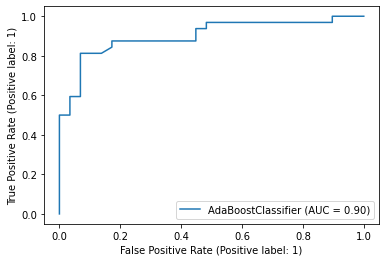

In [32]:
plot_roc_curve(clf_e, x_test, y_test)
plt.show()

In [33]:

clf_e_cross_val = cross_val_score(clf_e, x_train, y_train, cv=20) 
clf_e_cross_val

array([0.76923077, 0.84615385, 0.75      , 0.58333333, 0.83333333,
       0.58333333, 0.91666667, 0.58333333, 0.58333333, 0.58333333,
       0.66666667, 0.75      , 0.83333333, 0.41666667, 0.66666667,
       0.91666667, 0.5       , 0.83333333, 0.75      , 0.66666667])

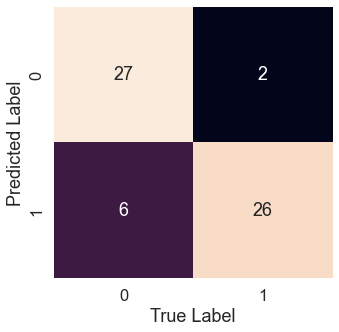

In [34]:
snb.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    
    fig, ax = plt.subplots(figsize= (5,5))
    ax = snb.heatmap(confusion_matrix(y_test, y_preds), annot=True,cbar=False)
    
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
plot_conf_mat(y_test, y_pred_e)

In [37]:
clf_f = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf_f.fit(x_train, y_train)
clf_f.score(x_test, y_test)

0.7868852459016393

In [38]:
y_pred_f = clf_f.predict(x_test)
print(classification_report(y_test, y_pred_f))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80        29
           1       0.88      0.69      0.77        32

    accuracy                           0.79        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



In [39]:
clf.score(x_test, y_test)

0.8360655737704918

In [40]:
y_pred_svc = clf.predict(x_test)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84        29
           1       0.92      0.75      0.83        32

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61



In [41]:
np.random.seed(42)
clf_g = tree.DecisionTreeClassifier()
clf_g.fit(x_train, y_train)
clf_g.score(x_test, y_test)

0.7868852459016393

In [42]:
y_pred_g = clf_g.predict(x_test)
print(classification_report(y_test, y_pred_g))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        29
           1       0.83      0.75      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [43]:
clf_h = MLPClassifier(random_state=1, max_iter=300)
clf_h.fit(x_train, y_train)
clf_h.score(x_test, y_test)

0.8360655737704918

In [44]:
y_pred_h = clf_h.predict(x_test)
print(classification_report(y_test, y_pred_h))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [45]:
from sklearn.naive_bayes import GaussianNB
clf_i = GaussianNB()
clf_i.fit(x_train, y_train)

GaussianNB()

In [46]:
clf_i.score(x_test, y_test)

0.7868852459016393

In [47]:
y_pred_i = clf_i.predict(x_test)
print(classification_report(y_test, y_pred_i))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78        29
           1       0.81      0.78      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'KNN'),
  Text(1, 0, 'Decision Tree'),
  Text(2, 0, 'Naive-Bayes'),
  Text(3, 0, 'Logistic Regression'),
  Text(4, 0, 'Random Forest'),
  Text(5, 0, 'Gradient Boost'),
  Text(6, 0, 'Support Vector'),
  Text(7, 0, 'Multi-Layer Perceptron'),
  Text(8, 0, 'AdaBoost')])

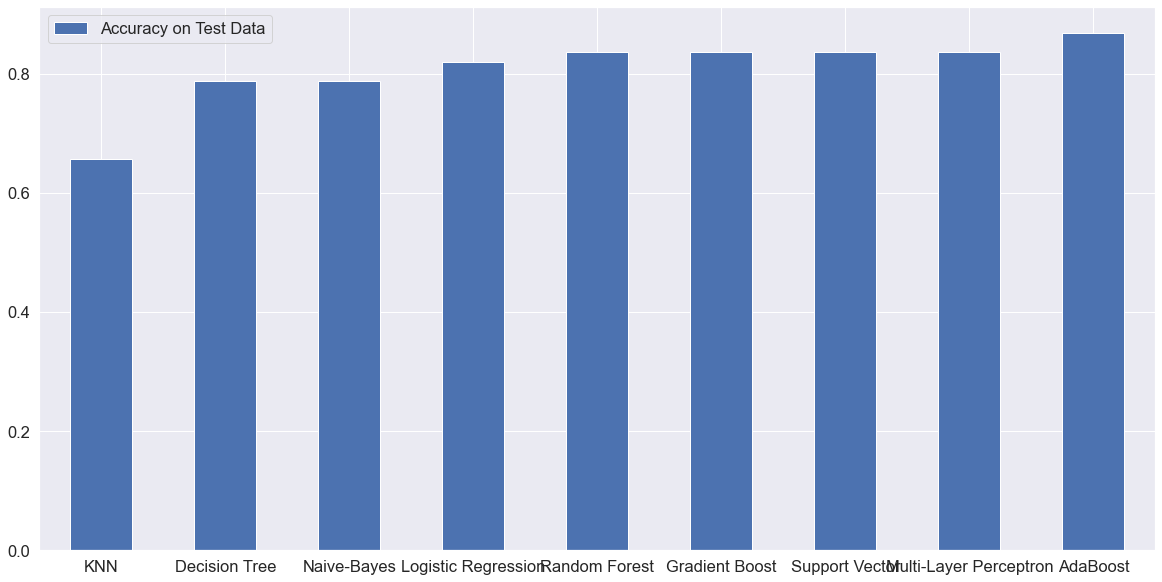

In [51]:
compare_acc = {'KNN': clf_b.score(x_test, y_test),
              'Decision Tree': clf_g.score(x_test, y_test),
              'Naive-Bayes': clf_i.score(x_test, y_test),
              'Logistic Regression': clf_a.score(x_test, y_test),
              'Random Forest': clf_c.score(x_test, y_test),
              'Gradient Boost': clf_d.score(x_test, y_test),
              'Support Vector': clf.score(x_test, y_test),
              'Multi-Layer Perceptron': clf_h.score(x_test, y_test),
              'AdaBoost': clf_e.score(x_test, y_test)
             }
model_compare = pd.DataFrame(compare_acc, index=['Accuracy on Test Data'])

model_compare.T.plot(kind='bar', figsize=(20,10));
#plt.yticks()
plt.xticks(rotation=0)

In [ ]:
ada = AdaBoostClassifier()
param_grid = {
    'n_estimators' : [100, 200, 300, 400, 500, 1000, 2000],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0, 1.1],
    'random_state' : [0, 1, 2, 3, 4, 5, 6]
}
crossvalidation = KFold(n_splits=10,shuffle=True,random_state=1)

gs_clf_e = GridSearchCV(estimator=ada, param_grid = param_grid, scoring='accuracy', n_jobs=1, cv=5)
gs_clf_e.fit(x_train, y_train)

In [ ]:
gs_clf_e.score(x_test, y_test)

In [ ]:
# Number of trees in random forest
n_estimators = np.arange(100, 2000, 200)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = np.arange(2, 40, 2)
# Minimum number of samples required at each leaf node
min_samples_leaf = np.arange(1, 20, 1)
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

In [ ]:
rf_random = RandomizedSearchCV(estimator = clf_c, 
                               param_distributions = random_grid, 
                               n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
rf_random.fit(x_train, y_train)


In [ ]:
rf_random.score(x_test, y_test)

In [ ]:
rf_random.best_params_

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(x_train, y_train)


In [ ]:
grid_search.score(x_test, y_test)


In [ ]:
import joblib as jb

jb.dump(clf, 'model.pkl')



In [ ]:
import pickle
with open('model_two.pkl', 'wb') as file:
    pickle.dump(clf, file)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf3 = MLPClassifier(random_state=1, max_iter=300).fit(x_train, y_train)

In [ ]:
clf3.score(x_test, y_test)